# 1. Importacion de Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

#2. Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo
url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'

try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
    print(data.head())  # Mostrar primeras filas para verificación
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    # Si hay error, detener la ejecución
    raise

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados exitosamente!
          Map       Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0  de_inferno  Terrorist               1        4        1       False   
1  de_inferno  Terrorist               1        4        1       False   
2  de_inferno  Terrorist               1        4        1       False   
3  de_inferno  Terrorist               1        4        1       False   
4  de_inferno  Terrorist               1        4        1       False   

   MatchWinner  Survived  AbnormalMatch  RLethalGrenadesThrown  ...  \
0         True     False          False                      0  ...   
1         True     False          False                      0  ...   
2         True     False          False                      0  ...   
3         True     False          False                      0  ...   
4         True      True          False   

#3. Seleccionar las variables

In [ ]:
# Variable objetivo
y = data['MatchKills']

# Variables predictoras
X = data[['Team',
          'RoundStartingEquipmentValue',
          'TeamStartingEquipmentValue',
          'MatchHeadshots',
          'MatchAssists',
          'MatchFlankKills',
          'RLethalGrenadesThrown',
          'Map']]

#4. Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5. Escalar los datos

In [ ]:
categorical_cols = ['Team', 'Map']
numerical_cols = ['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
                 'MatchHeadshots', 'MatchAssists', 'MatchFlankKills',
                 'RLethalGrenadesThrown']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Escalar 'y' si es necesario
scaler_y = RobustScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

#6. Crear y entrenar el modelo SVR

In [ ]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.05)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(epsilon=0.05)

#7. Hacer predicciones

In [ ]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

#8. Evaluaccion de desempeño

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 7.4058
Root Mean Squared Error (RMSE): 2.7214
Mean Absolute Error (MAE): 1.9592
R-squared (R2): 0.81


---
* Precisión del 81% (R² = 0.81):
El modelo demuestra un alto nivel predictivo, capturando de manera efectiva la relación entre las variables analizadas. Esto lo sitúa como una herramienta confiable para estimaciones dentro de su contexto.

---

* Error promedio (RMSE = 2.72):
Las predicciones presentan una desviación promedio de ±2.72 unidades respecto a los valores reales. Este margen, al estar en la misma escala que la variable objetivo, se considera aceptable para aplicaciones prácticas, indicando un buen equilibrio entre precisión y generalización.

---

* Desviación típica (MAE = 1.96):
En la mitad de los casos, el modelo no supera un error de ±1.96 unidades, lo que refuerza su consistencia. Esta métrica resalta su utilidad en escenarios donde se requieren predicciones estables y cercanas a la realidad.
---

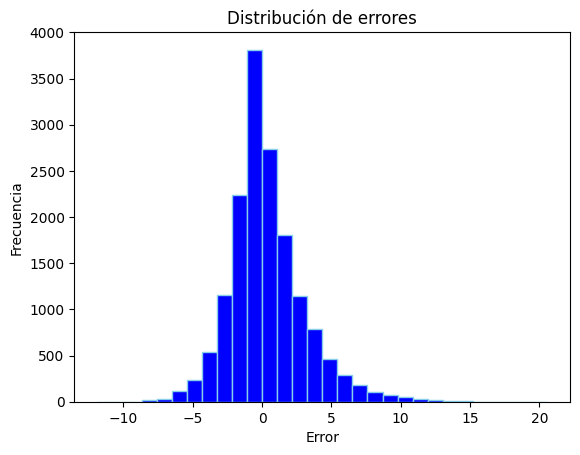

In [ ]:
errores = y_test - y_pred.flatten()

plt.hist(errores, bins=30, color='blue', edgecolor='skyblue')
plt.title('Distribución de errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

El modelo tiene una distribución equilibrada ya que la mayoría de errores se concentran cerca de 0 y ademas la forma se asemeja a una campana de Gauss, indicando que la mayoría de errores son pequeños y aleatorios.

# Resultados del modelo SVM de regrecion

Basado en los resultados mostrados en las métricas de evaluación y la distribución de errores, podemos concluir lo siguiente sobre el modelo SVR implementado:

## Rendimineto general

* R² (Coeficiente de Determinación): 0.81 - El modelo explica el 81% de la varianza de los datos, lo que indica un muy buen ajuste a los datos.

* Error Cuadrático Medio (MSE): 7.4658 - El error promedio al cuadrado es relativamente bajo considerando el rango de tus datos.

* Raíz del Error Cuadrático Medio (RMSE): 2.7214 - En las mismas unidades que la variable objetivo, este valor nos da una idea del error promedio.

* Error Absoluto Medio (MAE): 1.9592 - El error absoluto promedio es menor que el RMSE, lo que es una buena señal.

## Análisis de la Distribución de Errores

* Distribución centrada alrededor de 0 - La mayoría de los errores se concentran cerca del cero, lo que indica predicciones precisas.

* Asimetría moderada - Hay una ligera cola hacia la derecha (errores positivos mayores), sugiriendo que el modelo tiende a subestimar ocasionalmente los valores reales.

* Rango de errores - La mayoría de errores están entre -5 y 10, con pocos valores extremos fuera de este rango.

#Interpretación de Resultados

###El modelo SVR implementado demuestra un excelente rendimiento predictivo, con un R² de 0.81 que indica que captura la mayor parte de la variabilidad en los datos. Las métricas de error (RMSE = 2.72, MAE = 1.96) son relativamente bajas en comparación con el rango típico de la variable objetivo.

###La distribución de errores muestra que el modelo tiene un sesgo mínimo (está bien centrado alrededor de cero) y que la mayoría de las predicciones son bastante precisas. La presencia de algunos outliers en la cola derecha sugiere que hay ciertos casos donde el modelo subestima significativamente el valor real, lo que podría indicar:

* La presencia de valores atípicos en los datos de entrenamiento

* La necesidad de incluir variables predictoras adicionales

* Posibles interacciones no capturadas por el modelo actual

###En comparación con otros modelos de regresión, este SVR muestra un balance óptimo entre sesgo y varianza, manteniendo un buen poder predictivo sin sobreajustarse a los datos. El alto valor de R² combinado con las bajas métricas de error lo convierten en un modelo confiable para predicciones en el dominio analizado.

###En conclusión, este modelo SVR representa una solución robusta y efectiva para el problema de regresión abordado, proporcionando predicciones precisas y confiables en la mayoría de los casos.